### <p style="text-align: center;">[Posets & DM] - Amantur Amatov - 2</p>
 ----------------------

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### 1. Task 
**Build Formal Concept Lattice for given formal context.**

In [2]:
fc_dict = {'AIC':[1,1,1,1,1,0,1,1,1],
          'ANZ':[0,1,0,1,0,0,0,0,1],
          'ANA':[0,1,0,1,0,0,0,0,1],
          'AAS':[0,0,0,1,0,0,0,0,0],
          'AAG':[0,1,1,1,1,1,0,0,1],
          'BRM':[0,1,0,0,0,0,0,0,0],
          'LFH':[1,1,1,1,1,1,1,0,1],
          'MEX':[1,0,1,0,0,0,1,1,1],
          'SCA':[1,1,0,1,0,1,0,0,1],
          'SNA':[0,1,1,1,1,1,0,0,1],
          'TAI':[1,1,0,1,0,0,0,1,1],
          'UNA':[1,1,1,1,0,0,1,1,1],
          'VAR':[1,1,0,1,0,1,1,0,1]}
fc_col = ['la', 'eu', 'ca', 'ap', 'me','af','mx','cr','us']
fc = pd.DataFrame.from_dict(fc_dict, orient='index', columns=fc_col)
fc

,la,eu,ca,ap,me,af,mx,cr,us
AIC,1,1,1,1,1,0,1,1,1
ANZ,0,1,0,1,0,0,0,0,1
ANA,0,1,0,1,0,0,0,0,1
AAS,0,0,0,1,0,0,0,0,0
AAG,0,1,1,1,1,1,0,0,1
BRM,0,1,0,0,0,0,0,0,0
LFH,1,1,1,1,1,1,1,0,1
MEX,1,0,1,0,0,0,1,1,1
SCA,1,1,0,1,0,1,0,0,1
SNA,0,1,1,1,1,1,0,0,1


### Solution

At first, let us find extents:

In [3]:
import itertools

#finding extents
extents_list = []
for (columnName, columnData) in fc.iteritems():
    ext = columnData[columnData==1].to_dict()
    extents_list.append(set(ext.keys()))

full_list = []
for L in range(0, len(extents_list)+1):
    for subset in itertools.combinations(extents_list, L):
        full_list.append(list(subset))

full_extent_list = [frozenset(),frozenset({'AIC', 'ANZ', 'ANA', 'AAS', 'AAG', 'BRM', 
                                           'LFH', 'MEX', 'SCA', 'SNA','TAI', 'UNA', 'VAR'})]
for set_list in full_list:
    if len(set_list)==0:
        continue
    full_extent_list.append(frozenset(set.intersection(*set_list)))


unique_extents = [list(x) for x in set(full_extent_list)]

Then, intents. And bind them into dictionary for easier use.

In [4]:
# finding concepts
dict_concepts = {}
concepts = []
for extent in unique_extents:
    set_list = []
    for ext_el in extent:
        intent = fc[fc.loc[[ext_el]]==1].loc[[ext_el]].dropna(axis='columns').columns.to_list()
        set_list.append(set(intent))
    if len(extent)==0:
        intent = ['la', 'eu', 'ca', 'ap', 'me','af','mx','cr','us']
    else:
        intent = list(set.intersection(*set_list))

    # adding to dictionary
    dict_concepts[unique_extents.index(extent)] = (frozenset(extent),frozenset(intent))
    concepts.append(frozenset(intent))
concept_string = ['_'.join(i) for i in concepts]

In [5]:
# Build relations
relations = {}
for i in concepts:
    relations[i] = set()
    for j in concepts:
        if len(i) < len(j) and len(i.intersection(j)) == len(i):
            relations[i].add(j)
# Find transitive relations
transitive_relations = {}
for i in relations:
    transitive_relations[i] = set()
    for j in relations[i]:
        for k in relations[i]:
            if len(j) < len(k) and len(k.intersection(j)) == len(j):
                transitive_relations[i].add(k)
# Reduce transitive relations
for i in relations:
    relations[i] = (relations[i].difference(transitive_relations[i]))

Let us find all relations between our concepts.

In [6]:
n = 1
relations_string = []
relations_list = []
for key in sorted(relations):
    for value in relations[key]:
        relations_list.append((key,value))
        relations_string.append(('_'.join(key),'_'.join(value)))
        print(str(n)+'. {' + '_'.join(key) + '} - {' + '_'.join(value)+'}')
        n += 1

1. {} - {ap}
2. {} - {us}
3. {} - {eu}
4. {us_ap_eu} - {us_af_ap_eu}
5. {us_ap_eu} - {ca_ap_us_eu}
6. {us_ap_eu} - {us_ap_eu_la}
7. {af_ap_eu_la_us} - {af_ap_eu_la_us_mx}
8. {ca_us} - {ca_ap_us_eu}
9. {ca_us} - {ca_us_mx_la}
10. {us_mx_la} - {ap_eu_la_us_mx}
11. {us_mx_la} - {ca_us_mx_la}
12. {ca_us_mx_la} - {ca_ap_eu_la_us_mx}
13. {ca_us_mx_la} - {ca_cr_la_us_mx}
14. {eu} - {us_ap_eu}
15. {ap} - {us_ap_eu}
16. {us} - {us_ap_eu}
17. {us} - {ca_us}
18. {us} - {us_la}
19. {cr_us_la} - {cr_ap_eu_la_us}
20. {cr_us_la} - {ca_cr_la_us_mx}
21. {cr_ap_eu_la_us} - {ca_cr_ap_eu_la_us_mx}
22. {ca_ap_us_eu} - {ca_ap_eu_la_us_mx}
23. {ca_ap_us_eu} - {ca_me_ap_eu_us}
24. {us_ap_eu_la} - {cr_ap_eu_la_us}
25. {us_ap_eu_la} - {ap_eu_la_us_mx}
26. {us_ap_eu_la} - {af_ap_eu_la_us}
27. {ca_ap_eu_la_us_mx} - {ca_cr_ap_eu_la_us_mx}
28. {ca_ap_eu_la_us_mx} - {ca_me_ap_eu_la_us_mx}
29. {ca_me_ap_eu_us} - {ca_me_af_ap_eu_us}
30. {ca_me_ap_eu_us} - {ca_me_ap_eu_la_us_mx}
31. {us_la} - {cr_us_la}
32. {us_la} - {

From these relations we can build our Formal Concept Lattice.

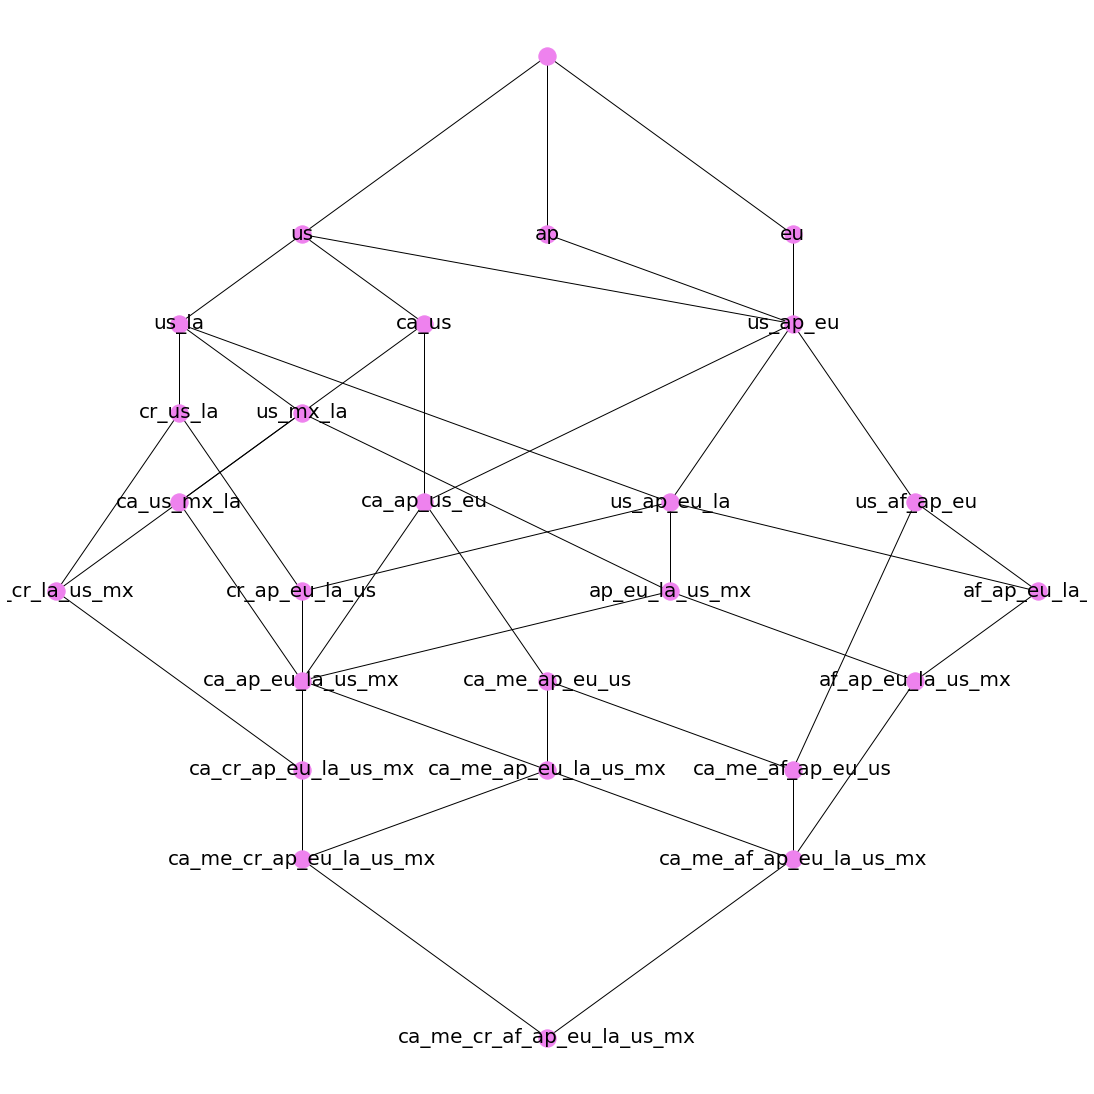

In [7]:
from networkx.drawing.nx_agraph import to_agraph
from numpy import array
G = nx.Graph()
concept_string.sort(key=lambda s: len(s))
G.add_nodes_from(concepts)
G.add_edges_from(relations_list)

dict_nodes = {i:'_'.join(i) for i in concepts}

pos = {frozenset({'mx', 'me', 'eu', 'us', 'cr', 'ca', 'af', 'la', 'ap'}): array([0, -1.75]), 
       frozenset({'mx', 'me', 'eu', 'us', 'ca', 'af', 'la', 'ap'}): array([0.5, -1.25]), 
       frozenset({'mx', 'me', 'eu', 'us', 'cr', 'ca', 'la', 'ap'}): array([-0.5, -1.25]), 
       frozenset({'mx', 'eu', 'us', 'cr', 'ca', 'la', 'ap'}): array([-0.5,  -1]), 
       frozenset({'mx', 'me', 'eu', 'us', 'ca', 'la', 'ap'}): array([0, -1]),
       frozenset({'mx', 'eu', 'us', 'ca', 'la', 'ap'}): array([-0.5 ,  -.75]), 
       frozenset({'mx', 'eu', 'us', 'af', 'la', 'ap'}): array([0.75, -.75]), 
       frozenset({'me', 'eu', 'us', 'ca', 'af', 'ap'}): array([ 0.5 , -1]), 
       frozenset({'mx', 'us', 'cr', 'ca', 'la'}): array([-1,  -0.5]), 
       frozenset({'me', 'eu', 'us', 'ca', 'ap'}): array([ 0, -0.75]), 
       frozenset({'eu', 'us', 'af', 'la', 'ap'}): array([1.        , -0.5]), 
       frozenset({'mx', 'eu', 'us', 'la', 'ap'}): array([0.25, -0.5]), 
       frozenset({'eu', 'us', 'cr', 'la', 'ap'}): array([-0.5,  -0.5]), 
       frozenset({'eu', 'us', 'la', 'ap'}): array([0.25, -0.25]), 
       frozenset({'eu', 'ca', 'us', 'ap'}): array([-0.25, -0.25]), 
       frozenset({'la', 'us', 'ca', 'mx'}): array([-0.75, -0.25]), 
       frozenset({'eu', 'us', 'af', 'ap'}): array([ 0.75, -0.25]), 
       frozenset({'eu', 'us', 'ap'}): array([ .5, 0.25]), 
       frozenset({'la', 'us', 'cr'}): array([-0.75, 0]), 
       frozenset({'la', 'mx', 'us'}): array([-.5, 0]), 
       frozenset({'la', 'us'}): array([-0.75, 0.25]), 
       frozenset({'ca', 'us'}): array([-.25, 0.25]), 
       frozenset({'us'}): array([-0.5, 0.5]), 
       frozenset({'eu'}): array([ 0.5, 0.5]), 
       frozenset({'ap'}): array([ 0 , 0.5]), 
       frozenset(): array([0, 1])}
# pos = nx.spring_layout(G)
# print(pos.keys())
plt.figure(figsize=(15,15))
nx.draw(G, pos, node_color='violet', with_labels = True, font_size=20, labels = dict_nodes)
plt.show()

### 2. Task
Find base of implications (on set of attributes) in terms of proper premises.

### Solution

At first let us look again at our Formal Concept Context.

In [8]:
fc_t = fc.transpose()
fc

,la,eu,ca,ap,me,af,mx,cr,us
AIC,1,1,1,1,1,0,1,1,1
ANZ,0,1,0,1,0,0,0,0,1
ANA,0,1,0,1,0,0,0,0,1
AAS,0,0,0,1,0,0,0,0,0
AAG,0,1,1,1,1,1,0,0,1
BRM,0,1,0,0,0,0,0,0,0
LFH,1,1,1,1,1,1,1,0,1
MEX,1,0,1,0,0,0,1,1,1
SCA,1,1,0,1,0,1,0,0,1
SNA,0,1,1,1,1,1,0,0,1


In [9]:
import itertools
import sys

def eliminate_subsets(a):
    
    out = []
    out_check = []
    sorted_a = sorted(a, key = lambda x: len(x[1]), reverse=True)
    
    for tup_set in sorted_a:
        key = tup_set[0]
        element = tup_set[1]
        for existing in out_check:
            if element & existing == element:
                break
        else:
            out.append(key)
            out_check.append(element)
            
    return out

def find_all_comb(a):
    
    result = set(x for l in a for x in l)
    out = []
    
    for L in range(0, len(result)+1):
        for subset in itertools.combinations(result, L):
            out.append(set(subset))
            
    return out

def check_for_min_intersec(a,b):
    
    intersections = []
    min_int = sys.maxsize
    
    for comb in a:
        flag = 1
        for existing_comb in b:
            if len(comb.intersection(existing_comb)) == 0:
                flag = 0
        if flag == 1:
            intersections.append(comb)
        for existing in intersections:
            if len(existing) < min_int:
                min_int = len(existing)

    return list(filter(lambda x: len(x)==min_int, intersections))

In [10]:
output_dict = {}

for (columnName, columnData) in fc.iteritems():
    
    step2_list = fc.index[fc[columnName] == 0].tolist()
    unq_subsets = []
    
    for el in step2_list:
        set_list = fc_t.index[fc_t[el] == 1].tolist()
        unq_subsets.append([el, set(set_list)])
    unq_subsets_2 = []
    for el in eliminate_subsets(unq_subsets):
        set_list_2 = fc_t.index[fc_t[el] == 0].tolist()
        set_list_2 = list(filter(lambda x: x != columnName, set_list_2))
        unq_subsets_2.append(set(set_list_2))
    all_comb = find_all_comb(unq_subsets_2)
    min_intersec = check_for_min_intersec(all_comb, unq_subsets_2)
    if len(min_intersec) == 0:
        continue
    output_dict[columnName] = min_intersec

output_dict

{'la': [{'cr'}, {'mx'}],
 'eu': [{'me'}, {'af'}],
 'ca': [{'me'}],
 'ap': [{'me'}, {'af'}],
 'me': [{'af', 'ca'}, {'af', 'cr'}],
 'mx': [{'ca', 'cr'}, {'ca', 'la'}, {'cr', 'me'}, {'la', 'me'}, {'af', 'cr'}],
 'us': [{'ca'}, {'me'}, {'cr'}, {'af'}, {'la'}, {'mx'}]}

At last, we need to intersect these implications in order to get the base of implications in terms of proper premises.  
**Answer:**  
We have the next base of implications:
1. $\{la\} \rightarrow \{la, us\}$
2. $\{ca\} \rightarrow \{ca, us\}$
3. $\{af\} \rightarrow \{af, ap,eu, us\}$
4. $\{mx\} \rightarrow \{la, mx, us\}$
5. $\{me\} \rightarrow \{ap,ca,eu,me,us\}$
6. $\{cr\} \rightarrow \{la,cr,us\}$
7. $\{la, eu\} \rightarrow \{la,eu,ap,us\}$
8. $\{la, ca\} \rightarrow \{la,ca,mx,us\}$
9. $\{la, ap\} \rightarrow \{la,eu,ap,us\}$
10. $\{la, me\} \rightarrow \{la,eu,ca,me,mx,ap,us\}$
11. $\{ca, eu\} \rightarrow \{eu,ca,ap,us\}$
12. $\{ap, eu\} \rightarrow \{eu,ap,us\}$
13. $\{mx, eu\} \rightarrow \{la,eu,mx,ap,us\}$
14. $\{cr, eu\} \rightarrow \{la,eu,cr,ap,us\}$
15. $\{us, eu\} \rightarrow \{eu,ap,us\}$
16. $\{ca, ap\} \rightarrow \{eu,ca,me,af,ap,us\}$
17. $\{ca, cr\} \rightarrow \{la,ca,mx,cr,us\}$
18. $\{ca, af\} \rightarrow \{eu,ca,ap,me,af,us\}$
19. $\{ap, mx\} \rightarrow \{la,eu,ap,mx,us\}$
20. $\{ap, cr\} \rightarrow \{la,eu,ap,cr,us\}$
21. $\{ap, us\} \rightarrow \{eu,ap,us\}$
22. $\{af, cr\} \rightarrow \{af,ap,ca,cr,eu,me,mx,us\}$
23. $\{me, cr\} \rightarrow \{ap,ca,cr,eu,me,mx,us\}$
24. $\{mx, cr\} \rightarrow \{la,ca,mx,cr,us\}$

### 3. Task
Find coverage of associative rules with min_support > 3/13 min_conf > 4/10

### Solution

In [11]:
relations_df = pd.DataFrame([(key, var) for (key, L) in relations.items() for var in L], columns=['Intent_From','Intent_To'])
# relations_df
concepts_df = pd.DataFrame.from_dict(dict_concepts, orient='index', columns=['Extent','Intent'])
relations_df
merge_df = pd.merge(left=relations_df, right=concepts_df, left_on='Intent_To', right_on='Intent')
merge_df = pd.merge(left=merge_df, right=concepts_df, left_on='Intent_From', right_on='Intent')
merge_df = merge_df.drop(['Intent_x','Intent_y'], axis=1).rename(columns = {'Extent_x':'Extent_To','Extent_y':'Extent_From'})
# defining support
merge_df['Support'] = (merge_df['Extent_To'].str.len()/max(merge_df['Extent_From'].str.len())).round(6)
# defining confidence
merge_df['Confidence'] = (merge_df['Extent_To'].str.len()/merge_df['Extent_From'].str.len()).round(6)
merge_df['Level'] = merge_df['Extent_From'].str.len()
merge_df = merge_df.sort_values(by=['Level'],ascending=False).reset_index(drop=True).drop(['Level'], axis = 1)

In [12]:
# min_support > 3/13 min_conf > 4/10
merge_df_cond = merge_df.loc[(merge_df['Support'] > 3/13) & 
                             (merge_df['Confidence'] > 4/10)]
merge_df_cond

,Intent_From,Intent_To,Extent_To,Extent_From,Support,Confidence
0,(),(eu),"(AIC, BRM, VAR, LFH, ANA, TAI, ANZ, AAG, UNA, ...","(AIC, BRM, VAR, LFH, ANA, TAI, ANZ, AAG, AAS, ...",0.846154,0.846154
1,(),(us),"(AIC, VAR, LFH, ANA, TAI, ANZ, AAG, UNA, SCA, ...","(AIC, BRM, VAR, LFH, ANA, TAI, ANZ, AAG, AAS, ...",0.846154,0.846154
2,(),(ap),"(AIC, VAR, LFH, ANA, TAI, ANZ, AAG, AAS, UNA, ...","(AIC, BRM, VAR, LFH, ANA, TAI, ANZ, AAG, AAS, ...",0.846154,0.846154
3,(ap),"(us, ap, eu)","(AIC, VAR, LFH, ANA, TAI, ANZ, AAG, UNA, SCA, ...","(AIC, VAR, LFH, ANA, TAI, ANZ, AAG, AAS, UNA, ...",0.769231,0.909091
4,(eu),"(us, ap, eu)","(AIC, VAR, LFH, ANA, TAI, ANZ, AAG, UNA, SCA, ...","(AIC, BRM, VAR, LFH, ANA, TAI, ANZ, AAG, UNA, ...",0.769231,0.909091
5,(us),"(us, ap, eu)","(AIC, VAR, LFH, ANA, TAI, ANZ, AAG, UNA, SCA, ...","(AIC, VAR, LFH, ANA, TAI, ANZ, AAG, UNA, SCA, ...",0.769231,0.909091
6,(us),"(ca, us)","(AIC, LFH, AAG, UNA, MEX, SNA)","(AIC, VAR, LFH, ANA, TAI, ANZ, AAG, UNA, SCA, ...",0.461538,0.545455
7,(us),"(us, la)","(AIC, VAR, LFH, TAI, UNA, SCA, MEX)","(AIC, VAR, LFH, ANA, TAI, ANZ, AAG, UNA, SCA, ...",0.538462,0.636364
8,"(us, ap, eu)","(ca, ap, us, eu)","(AIC, LFH, AAG, UNA, SNA)","(AIC, VAR, LFH, ANA, TAI, ANZ, AAG, UNA, SCA, ...",0.384615,0.500000
9,"(us, ap, eu)","(us, af, ap, eu)","(VAR, LFH, AAG, SCA, SNA)","(AIC, VAR, LFH, ANA, TAI, ANZ, AAG, UNA, SCA, ...",0.384615,0.500000


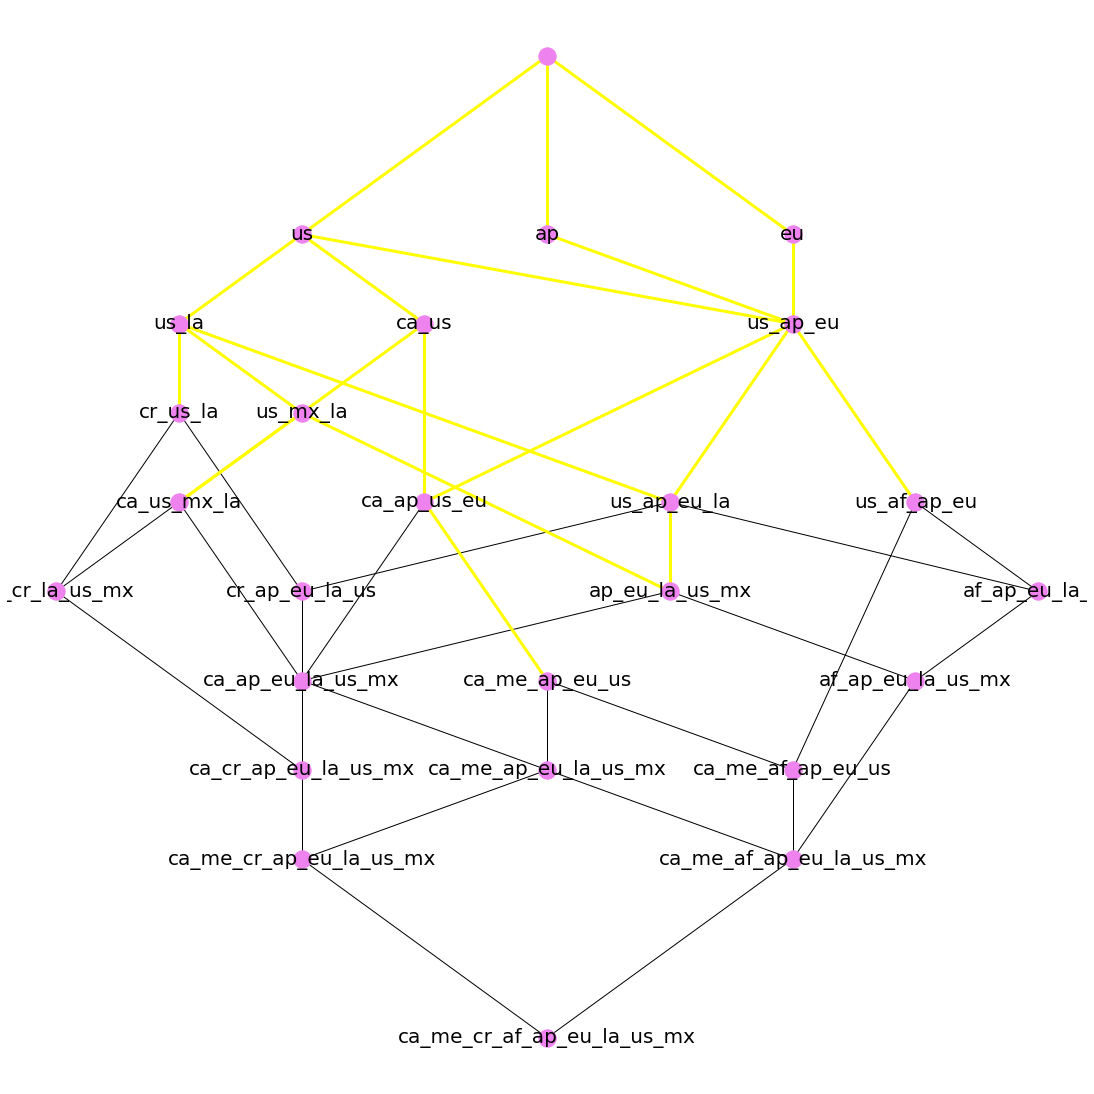

In [13]:
cond_relations = list(zip(merge_df_cond.Intent_From, merge_df_cond.Intent_To))
cond_relations_string = []

G = nx.Graph()
concept_string.sort(key=lambda s: len(s))
G.add_nodes_from(concepts)
G.add_edges_from(relations_list)

plt.figure(figsize=(15,15))
nx.draw(G, pos, node_color='violet', with_labels = True, font_size=20, labels = dict_nodes)
nx.draw_networkx_edges(G, pos, edgelist=cond_relations, edge_color='yellow', width=3)
plt.show()

#### 4. Task
We have 2 classes of graphs. For instance the target attribute can be “whether the element is toxic”  
First class consists of four examples:  
![alt text](HW2_images/first_class.png)  
The second class consists of three examples:  
![alt text](HW2_images/second_class.png)  
Please, follow JSM method and find minimal hypothesis for both classes.

### Solution:

Let us suppose, that the first class is toxic $G^+$ and the second class is not $G^-$. Let us find all possible combinations of objects in order to build formal concept lattices.

**For the first (positive) class:**

1. $\emptyset'' = \emptyset $
2. $G_1'' = G_1$
3. $G_2'' = G_2$
4. $G_3'' = G_3$
5. $G_4'' = G_4$
6. $\{G_1, G_2\}'' = \left\{\begin{array}{cccc}
  CH_3-& C &- OH \\
   & || &  \\
  NH_2-& C & 
  \end{array}\right\}' = \{G_1,G_2\}$
7. $\{G_1, G_3\}'' = 
  \left\{\begin{array}{cccc}
  CH_3-& C &- OH \\
   & || &  \\
  & C & 
  \end{array}\right\}' = \{G_1,G_2,G_3\}$
8. $\{G_1, G_4\}'' = 
\left\{\begin{array}{cccc}
CH_3-& C & \\
& || &  \\
& C & 
\end{array},\begin{array}{cccc}
& C &-OH \\
& || &  \\
& C & 
\end{array}\right\}' = \{G_1,G_2,G_3,G_4\}$
9. $\{G_2, G_3\}'' = 
\left\{\begin{array}{cccc}
CH_3-& C & -OH\\
& || &  \\
& C & 
\end{array},\begin{array}{cccc}
CH_3-& C & \\
& || &  \\
& C & -OH
\end{array}\right\}' = \{G_2,G_3\}$
10. $\{G_2, G_4\}'' = 
\left\{\begin{array}{cccc}
CH_3-& C & \\
& || &  \\
& C & -OH
\end{array}\right\}' = \{G_2,G_3,G_4\}$
9. $\{G_3, G_4\}'' = 
\left\{\begin{array}{cccc}
CH_3-& C & \\
& || &  \\
OH-& C & -Cl 
\end{array},\begin{array}{cccc}
CH_3-& C &-Cl \\
& || &  \\
& C & \end{array}\right\}' = \{G_3,G_4\}$


Now, we can construct the lattice and find the min hypos by traversing it from top to bottom.

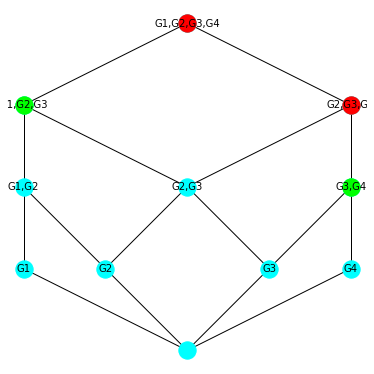

In [14]:
pos_nodes = ['G1,G2,G3,G4',
             'G1,G2,G3','G2,G3,G4',
             'G1,G2','G2,G3','G3,G4',
             'G1','G2','G3','G4','']
pos_edges = [('','G1'),('','G2'),('','G3'),('','G4'),
        ('G1,G2','G1'),('G1,G2','G2'),
        ('G2,G3','G2'),('G2,G3','G3'),
        ('G3,G4','G3'),('G3,G4','G4'),
        ('G1,G2,G3','G1,G2'),('G1,G2,G3','G2,G3'),
        ('G2,G3,G4','G2,G3'),('G2,G3,G4','G3,G4'),
        ('G1,G2,G3,G4','G1,G2,G3'),('G1,G2,G3,G4','G2,G3,G4')]
G_pos = nx.Graph()
G_pos.add_nodes_from(pos_nodes)
G_pos.add_edges_from(pos_edges)
plt.figure(figsize=(5,5))
pos = {
 'G1': array([-0.5, 0.5]),'G2': array([-0.25, 0.5]),'G3': array([ 0.25, 0.5]),'G4': array([0.5,0.5]),
 'G1,G2': array([-0.5,  1]),'G2,G3': array([0, 1]),'G3,G4': array([0.5, 1]),
 'G1,G2,G3': array([-0.5, 1.5]),'G2,G3,G4': array([0.5, 1.5]),
 'G1,G2,G3,G4': array([0, 2]),'': array([0, 0])}
nx.draw(G_pos, pos, node_color='Cyan', with_labels = True, font_size=10)
nx.draw_networkx_nodes(G, pos, nodelist=['G1,G2,G3,G4','G2,G3,G4'], node_color='red')
nx.draw_networkx_nodes(G, pos, nodelist=['G1,G2,G3','G3,G4'], node_color='lime')
plt.show()


1. $\{G_1,G_2,G_3,G_4\}'$ is not a hypothesis for positive class.$\{G_1,G_2,G_3,G_4\}'\sqsubseteq G_6'$ 
2. $\{G_1,G_2,G_3\}'$ is a hypothesis.
3. $\{G_2,G_3,G_4\}'$ is not a hypothesis for positive class.$\{G_1,G_2,G_3,G_4\}'\sqsubseteq G_6'$ 
4. $\{G_2,G_3\}'$ is a hypothesis.
5. $\{G_3,G_4\}'$ is a hypothesis.

From $\{G_1,G_2,G_3\}'$, $\{G_2,G_3\}'$,$\{G_3,G_4\}'$ we got, that $\{G_2,G_3\}'$ is not the minimal, because there is an edge between $\{G_2,G_3\}'$ and $\{G_1,G_2,G_3\}'$.

**Answer:**  
Minimal   hypotheses for positive class are:
$$\left\{\begin{array}{cccc}
  CH_3-& C &- OH \\
   & || &  \\
  & C & 
  \end{array}\right\}$$
$$ \left\{\begin{array}{cccc}
CH_3-& C & -OH\\
& || &  \\
& C & 
\end{array},\begin{array}{cccc}
CH_3-& C & \\
& || &  \\
& C & -OH
\end{array}\right\}$$

**For the second (negative) class:**

1. $\emptyset'' = \emptyset $
2. $G_5'' = G_1$
3. $G_6'' = G_2$
4. $G_7'' = G_3$
5. $\{G_5, G_6\}'' = \left\{\begin{array}{cccc}
  CH_3-& C & \\
   & || &  \\
  & C & -NH_2 
  \end{array}\right\}' = \{G_5,G_6\}$
6. $\{G_5, G_7\}'' = \left\{\begin{array}{cccc}
  NH_2-& C & \\
   & || &  \\
  & C & -NH_2 
  \end{array}\right\}' = \{G_5,G_7\}$
7. $\{G_6, G_7\}'' = 
  \left\{\begin{array}{cccc}
  NH_2-& C &- OH \\
   & || &  \\
  & C & -Cl
  \end{array}\right\}' = \{G_6,G_7\}$
8. $\{G_5, G_6, G_7\}'' = 
  \left\{\begin{array}{cccc}
  NH_2-& C & \\
   & || &  \\
  & C &
  \end{array}\right\}' = \{G_5, G_6, G_7\}$

Now, we can construct the lattice and find the min hypos by traversing it from top to bottom.

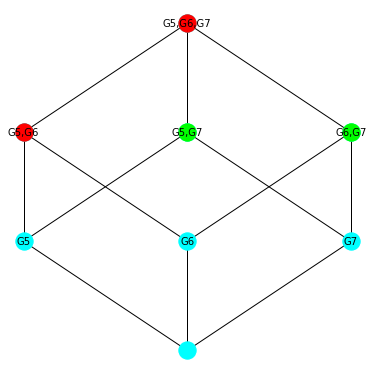

In [15]:
pos_nodes = ['G5,G6,G7',
             'G5,G6','G6,G7','G5,G7',
             'G5','G6','G7','']
pos_edges = [('','G5'),('','G6'),('','G7'),
        ('G5,G6','G5'),('G5,G6','G6'),
        ('G6,G7','G6'),('G6,G7','G7'),
        ('G5,G7','G5'),('G5,G7','G7'),
        ('G5,G6,G7','G5,G6'),('G5,G6,G7','G6,G7'),('G5,G6,G7','G5,G7')]
G_pos = nx.Graph()
G_pos.add_nodes_from(pos_nodes)
G_pos.add_edges_from(pos_edges)
plt.figure(figsize=(5,5))
pos = {
 'G5': array([-0.5, 0.5]),'G6': array([0, 0.5]),'G7': array([ 0.5, 0.5]),
 'G5,G6': array([-0.5,  1]),'G6,G7': array([0.5, 1]),'G5,G7': array([0, 1]),
 'G5,G6,G7': array([0, 1.5]),'': array([0, 0])}
nx.draw(G_pos, pos, node_color='Cyan', with_labels = True, font_size=10)
nx.draw_networkx_nodes(G, pos, nodelist=['G5,G6,G7','G5,G6'], node_color='red')
nx.draw_networkx_nodes(G, pos, nodelist=['G5,G7','G6,G7'], node_color='lime')
plt.show()

1. $\{G_5,G_6,G_7\}'$ is not a hypothesis for negative class.$\{G_5,G_6,G_7\}'\sqsubseteq \{G_1,G_2,G_3,G_4\}'$ 
2. $\{G_5,G_6\}'$ is not a hypothesis for negative class.$\{G_5,G_6\}'\sqsubseteq \{G_1\}'$ 
3. $\{G_5\}'$ is a hypothesis.
4. $\{G_5,G_7\}'$ is a hypothesis.
5. $\{G_6,G_7\}'$ is a hypothesis.

From $\{G_5\}'$, $\{G_5,G_7\}'$,$\{G_6,G_7\}'$ we got, that $\{G_5\}'$ is not the minimal, because there is an edge between $\{G_5\}'$ and $\{G_5,G_7\}'$.

**Answer:**  
Minimal hypotheses for negative class are:
$$\left\{\begin{array}{cccc}
  NH_2-& C & \\
   & || &  \\
  & C & -NH_2 
  \end{array}\right\}$$
$$\left\{\begin{array}{cccc}
  NH_2-& C &- OH \\
   & || &  \\
  & C & -Cl
  \end{array}\right\}$$

### 5. Task
**You are given the following training set:**  
2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,+  
6,11,6,8,5,6,11,5,6,11,9,4,3,12,2,4,+  
1,0,2,1,0,7,14,1,4,7,10,8,0,8,0,8,+  
2,7,4,4,1,8,15,1,5,6,11,8,0,8,0,8,+  
6,9,8,8,8,8,7,3,5,7,8,8,6,8,4,5,-  
5,10,7,8,5,8,3,3,1,7,1,8,5,9,5,8,-  
3,7,5,5,3,11,3,2,2,8,2,9,3,4,2,8,-  
**and the following test set:**  
3,9,5,7,3,12,3,4,3,11,1,9,2,6,3,9  
3,8,5,5,1,6,6,3,1,6,0,8,2,6,1,7  
3,2,4,3,2,8,7,3,9,6,6,8,2,8,6,8  
**a) Please find all “weak” hypothesis, or in other words, hypothesis which allow one counterexample.  
b) Find target classes for test set, using “weak” hypothesis from a)**

### Solution:

In [16]:
positive = np.array([[2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8],
                    [6,11,6,8,5,6,11,5,6,11,9,4,3,12,2,4],
                    [1,0,2,1,0,7,14,1,4,7,10,8,0,8,0,8],
                    [2,7,4,4,1,8,15,1,5,6,11,8,0,8,0,8]])

negative = np.array([[6,9,8,8,8,8,7,3,5,7,8,8,6,8,4,5],
                    [5,10,7,8,5,8,3,3,1,7,1,8,5,9,5,8],
                    [3,7,5,5,3,11,3,2,2,8,2,9,3,4,2,8]])

In [17]:
def format_data(row):
    alphabet = 'abcdefghijklmnop'
    columns = range(len(row))
    return set([alphabet[i]+':'+str(j) for i, j in zip(columns,row)])

In [18]:
from itertools import combinations
positive_hypo = []
for i in range(4,0,-1):
    for el in list(combinations([1,2,3,4],i)):
        prime = set()
        for j, obj in enumerate(el):
            if j==0:
                prime = prime|format_data(positive[obj-1])
            else:
                prime = prime&format_data(positive[obj-1])
        print(el, "': ", prime)
        
        #check weakness of hypothesis
        if len(prime)>0:
            if prime not in positive_hypo:
                positive_hypo.append(prime)
            for i in range(3):
                if format_data(negative[i]).issuperset(prime):
                    print("weak: {} is in {}-th negative object".format(el,i))

(1, 2, 3, 4) ':  set()
(1, 2, 3) ':  set()
(1, 2, 4) ':  set()
(1, 3, 4) ':  {'m:0', 'o:0', 'n:8', 'p:8', 'l:8'}
(2, 3, 4) ':  set()
(1, 2) ':  {'i:6'}
(1, 3) ':  {'m:0', 'o:0', 'p:8', 'n:8', 'k:10', 'l:8'}
(1, 4) ':  {'m:0', 'o:0', 'f:8', 'n:8', 'e:1', 'p:8', 'a:2', 'j:6', 'l:8'}
(2, 3) ':  set()
(2, 4) ':  set()
(3, 4) ':  {'m:0', 'o:0', 'p:8', 'n:8', 'h:1', 'l:8'}
(1,) ':  {'o:0', 'c:3', 'n:8', 'e:1', 'a:2', 'k:10', 'b:8', 'm:0', 'd:5', 'f:8', 'g:13', 'p:8', 'i:6', 'h:0', 'j:6', 'l:8'}
(2,) ':  {'n:12', 'j:11', 'c:6', 'e:5', 'o:2', 'd:8', 'k:9', 'f:6', 'a:6', 'p:4', 'g:11', 'i:6', 'h:5', 'l:4', 'b:11', 'm:3'}
(3,) ':  {'c:2', 'o:0', 'b:0', 'n:8', 'h:1', 'd:1', 'k:10', 'f:7', 'm:0', 'e:0', 'j:7', 'p:8', 'i:4', 'a:1', 'g:14', 'l:8'}
(4,) ':  {'c:4', 'o:0', 'n:8', 'e:1', 'a:2', 'h:1', 'i:5', 'm:0', 'f:8', 'k:11', 'p:8', 'd:4', 'g:15', 'j:6', 'b:7', 'l:8'}


In [19]:
positive_hypo = []
for i in range(4,0,-1):
    for el in list(combinations([1,2,3,4],i)):
        prime = set()
        for j, obj in enumerate(el):
            if j==0:
                prime = prime|format_data(positive[obj-1])
            else:
                prime = prime&format_data(positive[obj-1])
        print(el, "': ", prime)
        
        #check weakness of hypothesis
        if len(prime)>0:
            if prime not in positive_hypo:
                positive_hypo.append(prime)
            for i in range(3):
                if format_data(negative[i]).issuperset(prime):
                    print("weak: {} is in {}-th negative object".format(el,i))

(1, 2, 3, 4) ':  set()
(1, 2, 3) ':  set()
(1, 2, 4) ':  set()
(1, 3, 4) ':  {'m:0', 'o:0', 'n:8', 'p:8', 'l:8'}
(2, 3, 4) ':  set()
(1, 2) ':  {'i:6'}
(1, 3) ':  {'m:0', 'o:0', 'p:8', 'n:8', 'k:10', 'l:8'}
(1, 4) ':  {'m:0', 'o:0', 'f:8', 'n:8', 'e:1', 'p:8', 'a:2', 'j:6', 'l:8'}
(2, 3) ':  set()
(2, 4) ':  set()
(3, 4) ':  {'m:0', 'o:0', 'p:8', 'n:8', 'h:1', 'l:8'}
(1,) ':  {'o:0', 'c:3', 'n:8', 'e:1', 'a:2', 'k:10', 'b:8', 'm:0', 'd:5', 'f:8', 'g:13', 'p:8', 'i:6', 'h:0', 'j:6', 'l:8'}
(2,) ':  {'n:12', 'j:11', 'c:6', 'e:5', 'o:2', 'd:8', 'k:9', 'f:6', 'a:6', 'p:4', 'g:11', 'i:6', 'h:5', 'l:4', 'b:11', 'm:3'}
(3,) ':  {'c:2', 'o:0', 'b:0', 'n:8', 'h:1', 'd:1', 'k:10', 'f:7', 'm:0', 'e:0', 'j:7', 'p:8', 'i:4', 'a:1', 'g:14', 'l:8'}
(4,) ':  {'c:4', 'o:0', 'n:8', 'e:1', 'a:2', 'h:1', 'i:5', 'm:0', 'f:8', 'k:11', 'p:8', 'd:4', 'g:15', 'j:6', 'b:7', 'l:8'}


In [20]:
negative_hypo = []
for i in range(3,0,-1):
    for el in list(combinations([1,2,3],i)):
        prime = set()
        for j, obj in enumerate(el):
            if j==0:
                prime = prime|format_data(negative[obj-1])
            else:
                prime = prime&format_data(negative[obj-1])
        print(el, "': ", prime)
        
        #check weakness of hypothesis
        if len(prime)>0:
            if prime not in negative_hypo:
                negative_hypo.append(prime)
            for i in range(4):
                if format_data(positive[i]).issuperset(prime):
                    print("weak: {} is in {}-th positive object".format(el,i))

(1, 2, 3) ':  set()
(1, 2) ':  {'f:8', 'j:7', 'h:3', 'l:8', 'd:8'}
(1, 3) ':  set()
(2, 3) ':  {'g:3', 'p:8'}
(1,) ':  {'o:4', 'e:8', 'c:8', 'g:7', 'n:8', 'h:3', 'b:9', 'd:8', 'i:5', 'p:5', 'a:6', 'f:8', 'j:7', 'm:6', 'l:8', 'k:8'}
(2,) ':  {'m:5', 'c:7', 'n:9', 'g:3', 'h:3', 'e:5', 'd:8', 'o:5', 'i:1', 'a:5', 'k:1', 'f:8', 'j:7', 'p:8', 'b:10', 'l:8'}
(3,) ':  {'c:5', 'h:2', 'i:2', 'f:11', 'g:3', 'o:2', 'j:8', 'n:4', 'd:5', 'e:3', 'k:2', 'a:3', 'p:8', 'b:7', 'm:3', 'l:9'}


In [21]:
test = np.array([[3,9,5,7,3,12,3,4,3,11,1,9,2,6,3,9],
                [3,8,5,5,1,6,6,3,1,6,0,8,2,6,1,7],
                [3,2,4,3,2,8,7,3,9,6,6,8,2,8,6,8]])

In [22]:
for i in range(3):
    format_test = format_data(test[i])
    p = 0
    n = 0
    
    for pos in positive_hypo:
        if format_test.issuperset(pos):
            p+=1
    
    for neg in negative_hypo:
        if format_test.issuperset(neg):
            n+=1
            
    print("{}:positive = {}, negative = {}".format(i+1,p,n))

1:positive = 0, negative = 0
2:positive = 0, negative = 0
3:positive = 0, negative = 0


**Answer:**   
These objects from test sample do not belong to any hypothesis and they are still undetermined